In [363]:
# %matplotlib_qt

1D CAMBER LINE DISCRETE VORTEX PANEL METHOD

In [364]:
import airfoils as af
import matplotlib.pyplot as plt
import numpy as np 

SET AIRFOIL AND DEFINE THE CAMBER LINE

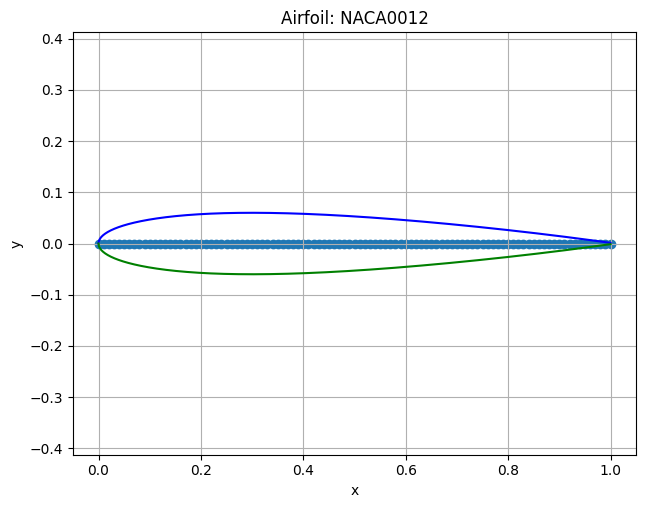

In [365]:
N = 100 # number of panels
name = '0012'
naca = af.Airfoil.NACA4(name,10*N)

x_camber = np.linspace(0,1,N+1)
y_camber = naca.camber_line(x_camber)

naca.plot(show=False)
plt.scatter(x_camber,y_camber)
plt.title(f'Airfoil: NACA{name}')
plt.gca().set_aspect('equal')

COLLOCATION POINTS (DEFINED ON THE CAMBERLINE AT THE THREE-QUARTER POINT OF EACH PANEL)

In [366]:
dy = np.diff(y_camber)  
dx = np.diff(x_camber)

a = np.empty((N,1)) 
a[:,0] = -np.arctan(dy/dx)

# normal vector n = (sina,cosa)
n = np.empty((N,2)) 
n[:,0] = np.sin(a[:,0])
n[:,1] = np.cos(a[:,0])

# tangential vector t = (cosa,-sina) 
t = np.empty((N,2))
t[:,0] = np.cos(a[:,0])
t[:,1] = -np.sin(a[:,0])

# collocation points 
collocation_x = (0.75*(x_camber[1:] - x_camber[:-1])) +  x_camber[:-1]
collocation_y = (0.75*(y_camber[1:] - y_camber[:-1])) +  y_camber[:-1]
collocation_points = np.concatenate((collocation_x.reshape(-1,1),collocation_y.reshape(-1,1)), axis=1)

# lumped-vortex elements
lumped_vortex_x = (0.25*(x_camber[1:] - x_camber[:-1])) +  x_camber[:-1]
lumped_vortex_y = (0.25*(y_camber[1:] - y_camber[:-1])) +  y_camber[:-1]
lumped_vortex = np.concatenate((lumped_vortex_x.reshape(-1,1),lumped_vortex_y.reshape(-1,1)), axis=1)

PLOT COLLOCATION POINTS AND THE LUMPED-VORTEX ELEMENTS

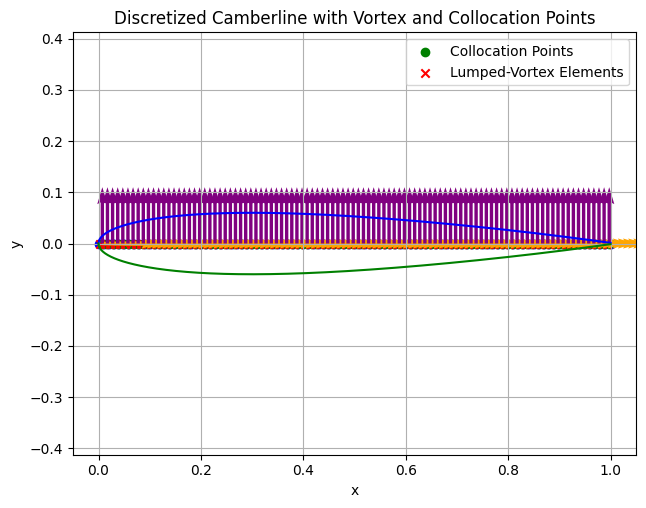

In [367]:
naca.plot(show=False)
plt.scatter(x_camber, y_camber, color="blue")
plt.scatter(collocation_points[:, 0], collocation_points[:, 1], label="Collocation Points", color="green")
plt.scatter(lumped_vortex[:, 0], lumped_vortex[:, 1], label="Lumped-Vortex Elements", color="red", marker='x')
plt.quiver(collocation_points[:, 0], collocation_points[:, 1], t[:, 0], t[:, 1], color="orange", scale=10)
plt.quiver(collocation_points[:, 0], collocation_points[:, 1], n[:, 0], n[:, 1], color="purple", scale=10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Discretized Camberline with Vortex and Collocation Points")
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal')
plt.show()

In [ ]:
def DVM(aoa):

    Uinf = 15
    rho = 1.225

    aoa = aoa * np.pi/180

    Q = Uinf * np.array((np.cos(aoa),np.sin(aoa)))
    RHS = -np.dot(n,Q)

    u = np.empty([N,N])
    w = np.empty([N,N])
    co = np.empty([N,N])

    for i in np.arange(N):
        for j in np.arange(N):
            u[i,j] = ((1/(2*np.pi)) * (collocation_y[i]-y_camber[j])) / (((collocation_x[i]-x_camber[j])**2) + ((collocation_y[i]-y_camber[j])**2))
            w[i,j] = -((1/(2*np.pi)) * (collocation_x[i]-x_camber[j])) / (((collocation_x[i]-x_camber[j])**2) + ((collocation_y[i]-y_camber[j])**2))
            co[i,j] = u[i,j]*n[i,0] + w[i,j]*n[i,1]

    G = np.linalg.solve(co,RHS)  

    dl = rho*Uinf*G
    L = np.sum(dl)
    cl = L /(0.5*rho*Uinf**2)

    return cl

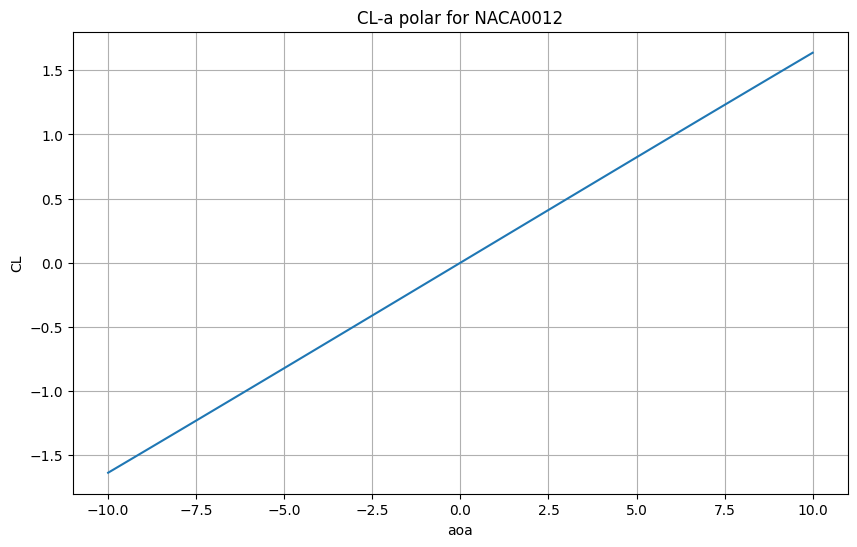

In [ ]:
cl = []
angles = np.linspace(-10,10,100)

for aoa in angles:
    cl_i = DVM(aoa)
    cl.append(cl_i)

plt.figure(figsize=(10,6))
plt.plot(angles,cl)
plt.xlabel('aoa')
plt.ylabel('CL')
plt.title(f'CL-a polar for NACA{name}')
plt.grid(True)